# VAR model for Dissertation M2 "Nowcasting Macroeconomic growth"

# Install Required Libraries:

In [1]:
#pip install statsmodels
#pip install pandas
#pip install numpy
#pip install matplotlib

# Import Libraries:

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Load data

In [3]:
#Read sentiments data index
sentiments_data = pd.read_csv("C:\\Users\cata9\OneDrive\Documentos\Memoire_Nowcasting_Macroeconomic_Growth\Sentiments_data.csv", sep=";")

In [4]:
#Ensure date strings are read as dates
sentiments_data["Date Time"] = sentiments_data["Date Time"].apply(lambda x: pd.to_datetime(x,dayfirst=True))

#Show the sentiment data
sentiments_data = sentiments_data.set_index("Date Time")
sentiments_data.head()

,Economic Sentiment Indicator
Date Time,
1999-11-30,0.58
1999-12-01,0.07
1999-12-02,0.29
1999-12-03,0.14
1999-12-05,0.26


In [5]:
sentiments_data.index

DatetimeIndex(['1999-11-30', '1999-12-01', '1999-12-02', '1999-12-03',
               '1999-12-05', '1999-12-06', '1999-12-07', '1999-12-08',
               '1999-12-09', '1999-12-10',
               ...
               '2023-05-21', '2023-05-22', '2023-05-23', '2023-05-24',
               '2023-05-25', '2023-05-29', '2023-05-30', '2023-05-31',
               '2023-06-01', '2023-06-02'],
              dtype='datetime64[ns]', name='Date Time', length=7355, freq=None)

In [6]:
#Convert daily sentiment data into quarterly data
sentiments_data_Q = sentiments_data.groupby(pd.PeriodIndex(sentiments_data.index, freq="Q")).mean() 

#Only keep complete quarters (i.e. get rid of Q2 of 2023)
sentiments_data_Q = sentiments_data_Q.loc[sentiments_data_Q.index[:-1]]

#Change index type to match GDP data
sentiments_data_Q.index = sentiments_data_Q.index.to_timestamp()

#Plot the head of quarterly sentiment index
sentiments_data_Q

,Economic Sentiment Indicator
Date Time,
1999-10-01,0.367143
2000-01-01,0.313333
2000-04-01,0.501282
2000-07-01,0.330641
2000-10-01,0.276835
...,...
2022-01-01,-0.366494
2022-04-01,-0.307821
2022-07-01,-0.274304


In [7]:
sentiments_data_Q = sentiments_data_Q.loc[(sentiments_data_Q.index < "2020-01-01") & (sentiments_data_Q.index >= "2000-01-01")]
sentiments_data_Q

,Economic Sentiment Indicator
Date Time,
2000-01-01,0.313333
2000-04-01,0.501282
2000-07-01,0.330641
2000-10-01,0.276835
2001-01-01,0.134545
...,...
2018-10-01,0.027595
2019-01-01,-0.074156
2019-04-01,0.040513


<AxesSubplot:xlabel='Date Time'>

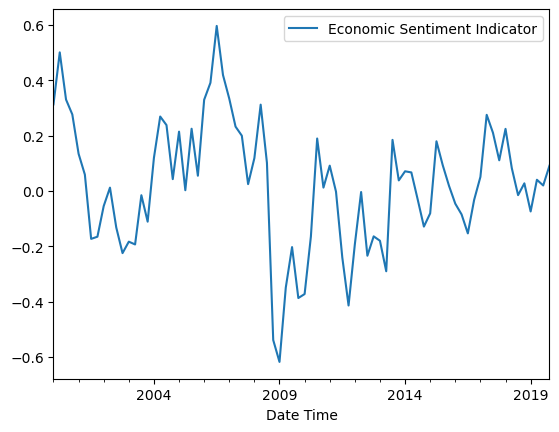

In [8]:
#Plot  sentiment data
sentiments_data_Q.plot()

In [9]:
#Load GDP data
gdp_data = pd.read_csv("C:\\Users\cata9\OneDrive\Documentos\Memoire_Nowcasting_Macroeconomic_Growth\Belgium_GDP_CSV.csv",sep=";")

#Ensure date strings are read as dates
gdp_data["Date Time"] = gdp_data["Date Time"].apply(lambda x: pd.to_datetime(x,dayfirst=True))

gdp_data = gdp_data.set_index("Date Time")
gdp_data

,Economic Growth
Date Time,
1995-04-01,0.42
1995-07-01,0.60
1995-10-01,0.21
1996-01-01,-0.20
1996-04-01,0.70
...,...
2022-01-01,0.62
2022-04-01,0.53
2022-07-01,0.31


In [10]:
gdp_data.index

DatetimeIndex(['1995-04-01', '1995-07-01', '1995-10-01', '1996-01-01',
               '1996-04-01', '1996-07-01', '1996-10-01', '1997-01-01',
               '1997-04-01', '1997-07-01',
               ...
               '2020-10-01', '2021-01-01', '2021-04-01', '2021-07-01',
               '2021-10-01', '2022-01-01', '2022-04-01', '2022-07-01',
               '2022-10-01', '2023-01-01'],
              dtype='datetime64[ns]', name='Date Time', length=112, freq=None)

In [11]:
gdp_data = gdp_data.loc[(gdp_data.index < "2020-01-01") & (gdp_data.index >= "2000-01-01")]
gdp_data

,Economic Growth
Date Time,
2000-01-01,0.71
2000-04-01,0.72
2000-07-01,0.46
2000-10-01,0.98
2001-01-01,0.06
...,...
2018-10-01,0.98
2019-01-01,0.27
2019-04-01,0.55


<AxesSubplot:xlabel='Date Time'>

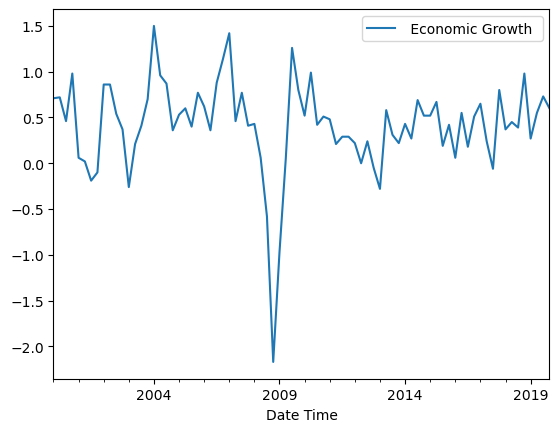

In [12]:
#Plot gdp data
gdp_data.plot()

# Combine the data

In [13]:
#Merge the two dataframes based on the common date column to ensure alignment of the data:
df = pd.DataFrame()

In [14]:
#Fill the Data Frame with the data
df["Sentiments"] = sentiments_data_Q
df["GDP"] = gdp_data

df

,Sentiments,GDP
Date Time,,
2000-01-01,0.313333,0.71
2000-04-01,0.501282,0.72
2000-07-01,0.330641,0.46
2000-10-01,0.276835,0.98
2001-01-01,0.134545,0.06
...,...,...
2018-10-01,0.027595,0.98
2019-01-01,-0.074156,0.27
2019-04-01,0.040513,0.55


<AxesSubplot:xlabel='Date Time'>

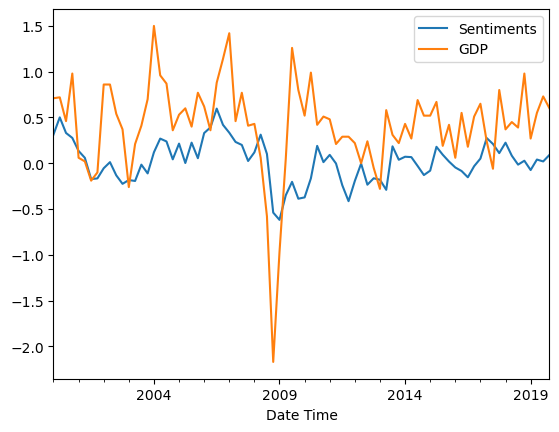

In [15]:
#Plot together quarterly Sentiments index and quarterly GDP data
df.plot()

In [16]:
#Split the dataset into training and test sets

training_size = 55
training_set = df.iloc[:training_size]
test_set = df.iloc[training_size:]

# Tests

# The Granger causality test
is a statistical hypothesis test for determining whether one time series is useful in forecasting another. Rather than testing whether X causes Y, the Granger causality tests whether X forecasts Y. We can use this test because we have a linear and stationary relation between both time series. Before we do the granger causality test, we calculate the number of lags to use with Akaike criterion information.

In [17]:
import statsmodels.api as sm

# Define the range of lag orders to consider
max_lag = 23

# Initialize variables
best_aic = float("inf")
best_lag_order = None

# Iterate over lag orders and calculate AIC
for lag_order in range(1, max_lag + 1):
    # Fit the model
    model = VAR(df)
    results = model.fit()
    
    # Calculate AIC
    aic = results.aic
    
    # Check if current AIC is the best so far
    if aic < best_aic:
        best_aic = aic
        best_lag_order = lag_order

# Output the optimal lag order
print("Optimal Lag Order:", best_lag_order)

Optimal Lag Order: 1


In [18]:
df

,Sentiments,GDP
Date Time,,
2000-01-01,0.313333,0.71
2000-04-01,0.501282,0.72
2000-07-01,0.330641,0.46
2000-10-01,0.276835,0.98
2001-01-01,0.134545,0.06
...,...,...
2018-10-01,0.027595,0.98
2019-01-01,-0.074156,0.27
2019-04-01,0.040513,0.55


In [19]:
from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-Causality test
max_lag_causality = 3 #We select 3 lags, where lag 1 is within it
grangercausalitytests(df, maxlag=max_lag_causality)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.6264 , p=0.0017  , df_denom=76, df_num=1
ssr based chi2 test:   chi2=11.0459 , p=0.0009  , df=1
likelihood ratio test: chi2=10.3389 , p=0.0013  , df=1
parameter F test:         F=10.6264 , p=0.0017  , df_denom=76, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.2713  , p=0.0073  , df_denom=73, df_num=2
ssr based chi2 test:   chi2=11.2648 , p=0.0036  , df=2
likelihood ratio test: chi2=10.5221 , p=0.0052  , df=2
parameter F test:         F=5.2713  , p=0.0073  , df_denom=73, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.6139  , p=0.0173  , df_denom=70, df_num=3
ssr based chi2 test:   chi2=11.9258 , p=0.0076  , df=3
likelihood ratio test: chi2=11.0878 , p=0.0113  , df=3
parameter F test:         F=3.6139  , p=0.0173  , df_denom=70, df_num=3


{1: ({'ssr_ftest': (10.626422103274804, 0.0016692783950935275, 76.0, 1),
   'ssr_chi2test': (11.04588613366723, 0.0008888420895532635, 1),
   'lrtest': (10.338851175382615, 0.0013025905918331712, 1),
   'params_ftest': (10.626422103274798, 0.0016692783950935444, 76.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (5.2713415683739635, 0.007271551551435398, 73.0, 2),
   'ssr_chi2test': (11.264784721456687, 0.003580000421871467, 2),
   'lrtest': (10.522062360671953, 0.005189950183859887, 2),
   'params_ftest': (5.271341568373966, 0.007271551551435364, 73.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.6138806792090064, 0.017329237982068067, 70.0, 3),
   'ssr_chi2test': (11.92580624138972, 0.007641686900322347, 3),
   'lrtest': (11.087766110350913, 0.011260635272665223, 3),
   'params_ftest': (3.613880679209006, 0.017329237982068067, 70.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
     

The F test statistic with a maximum lag of 3 (selected by Akaike criterion) is 3.635 and the corresponding p-value is 0.02.

Since the p-value is less than .05, we can reject the null hypothesis of the test and conclude that the knowing Sentiment is useful for predicting/forecasting the GDP.

When two or more time series are cointegrated, it means they have a long run, statistically significant relationship.

This is the basic premise on which Vector Autoregression(VAR) models is based on. So, we implement the cointegration test before starting to build the VAR model.

# The cointegrated test 
is use to know when two or more time series are cointegrated, if they do, it means they have a long run, statistically significant relationship.

This is the basic premise on which Vector Autoregression(VAR) models is based on. So, we implement the cointegration test before starting to build the VAR model.

In [20]:
#Import coint_johansen
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,0,1)   #0=the order of null hypothesis, implies that it is a constant term, there is no time trend in the polynomial. 1=number of lagged difference terms used when computing the estimator.
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Sentiments ::  39.83     > 15.4943   =>   True
GDP    ::  15.71     > 3.8415    =>   True


# Check for stationarity
The assumption of stationarity is that the mean and variance of the two series are approximately constant with time. We use the common Augmented Dickey Fuller test to check this assumption.

The null hypothesis for the ADF test is that the series in question is not stationary. So a rejection favours the alternative hypothesis of stationarity.

In [21]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    """Function to apply Augmented Dickey Fuller test"""
    dftest = adfuller(timeseries, autolag='AIC')
    result = pd.Series(dftest[0:4], index=['Test Statistic','P-value','Lags Used','No of Observations'])
    for key,value in dftest[4].items():
        result['Critical Value (%s)'%key] = value
    return result

In [22]:
training_set.apply(adf_test, axis = 0)

,Sentiments,GDP
Test Statistic,-2.929873,-3.704953
P-value,0.041983,0.004044
Lags Used,0.000000,0.000000
No of Observations,54.000000,54.000000
Critical Value (1%),-3.557709,-3.557709
Critical Value (5%),-2.916770,-2.916770
Critical Value (10%),-2.596222,-2.596222


From the above table, we can see that both the p-values of both series are less than 0.05, so we can reject the null hypothesis and say the two series are stationary.

# Select the optimal lag for training set

In [23]:
model = VAR(training_set)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -5.041026002033373
BIC :  -4.820027774637342
FPE :  0.006468591093753035
HQIC:  -4.955795652353793 

Lag Order = 2
AIC :  -4.957481641346873
BIC :  -4.585728450110624
FPE :  0.0070385286260628375
HQIC:  -4.814523293475965 

Lag Order = 3
AIC :  -4.8566676961511
BIC :  -4.331332848840716
FPE :  0.007801967555886068
HQIC:  -4.655266714326586 

Lag Order = 4
AIC :  -4.951761682220119
BIC :  -4.269940870670357
FPE :  0.0071239413431553105
HQIC:  -4.691217784145384 

Lag Order = 5
AIC :  -4.9231933050615675
BIC :  -4.081903182673183
FPE :  0.007383046881688467
HQIC:  -4.602825228119736 

Lag Order = 6
AIC :  -4.825803690653537
BIC :  -3.82198067532953
FPE :  0.008231415492600935
HQIC:  -4.444954638833382 

Lag Order = 7
AIC :  -4.710198743983689
BIC :  -3.540698112166257
FPE :  0.00940095109849555
HQIC:  -4.268242746943096 

Lag Order = 8
AIC :  -4.57358649471521
BIC :  -3.2351818466696356
FPE :  0.011053329303561506
HQIC:  -4.069935834595009 

Lag Order = 9
AIC :  -4.5

Again for the training set, as we saw already for the df above, the AIC drops to lowest at lag 1, then increases at lag 2 and so on.

# Train the VAR model 
train the model at the selected order before

In [24]:
result = model.fit(1)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 04, Jul, 2023
Time:                     21:06:19
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.82003
Nobs:                     54.0000    HQIC:                  -4.95580
Log likelihood:          -11.1377    FPE:                 0.00646859
AIC:                     -5.04103    Det(Omega_mle):      0.00580561
--------------------------------------------------------------------
Results for equation Sentiments
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.050387         0.029599           -1.702           0.089
L1.Sentiments         0.582811         0.101803            5.725           0.000
L1.GDP                0.129826         0.046363        

In [25]:
lag_order = results.k_ar
lag_order

1

# Check for Serial Correlation of Residuals Errors using Durbin Watson Statistic
If there is any correlation left in the residuals, then, there is some pattern in the time series that is still left to be explained by the model.The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

In [26]:
#Import Durbin-Watson statistic
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

#print the value for each variable
for column, val in zip(training_set.columns, out):
    print(column, ':', round(val, 2))

NameError: name 'model_fitted' is not defined

# Forecast VAR model

In [27]:
#define the prediction data frame
predictions = pd.DataFrame(index=test_set.index,columns=test_set.columns)

In [28]:
#Make a loop to forecast taking every point in the past
for i in range(len(test_set)):
    forecast_input = df.values[-len(test_set)-lag_order+i:-len(test_set)-lag_order+i+1]
    forecast = results.forecast(forecast_input, 1)[0]
    predictions.iloc[i]["Sentiments"] = forecast[0]
    predictions.iloc[i]["GDP"] = forecast[1]

predictions

,Sentiments,GDP
Date Time,,
2013-10-01,0.100822,0.323335
2014-01-01,0.003947,0.298824
2014-04-01,0.049292,0.411918
2014-07-01,0.027009,0.321957
2014-10-01,0.022667,0.577545
2015-01-01,-0.05647,0.499119
2015-04-01,-0.028436,0.490446
2015-07-01,0.142581,0.52834
2015-10-01,0.032337,0.271881


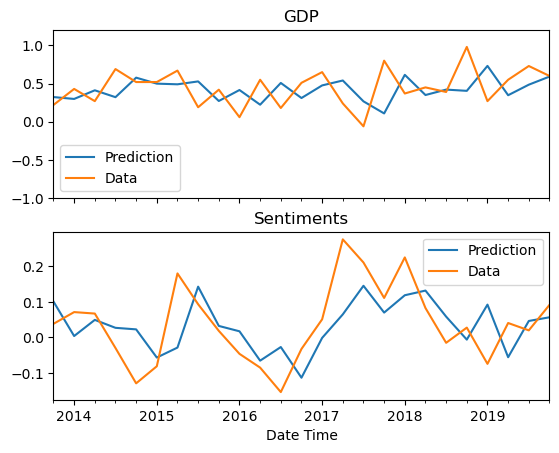

In [29]:
#Plot the actual data vs the prediction
fig, axs = plt.subplots(2,sharex=True)

axs[0].set_title("GDP")
axs[0].set_ylim([-1,1.2])
predictions["GDP"].plot(ax=axs[0],label="Prediction")
test_set["GDP"].plot(ax=axs[0],label="Data")

axs[0].legend()

axs[1].set_title("Sentiments")
predictions["Sentiments"].plot(ax=axs[1],label="Prediction")
test_set["Sentiments"].plot(ax=axs[1],label="Data")

axs[1].legend()

In [30]:
#Show prediction plus limits of the confidence interval (upper and lower)
predictions2 = pd.DataFrame(index=test_set.index,columns=["GDP","lower","upper"])

for i in range(len(test_set)):
    forecast_input = df.values[-len(test_set)-lag_order+i:-len(test_set)-lag_order+i+1]
    pred, lower, upper = results.forecast_interval(forecast_input, 1, alpha=0.32)
    predictions2.iloc[i]["lower"] = lower[0][1]
    predictions2.iloc[i]["upper"] = upper[0][1]
    predictions2.iloc[i]["GDP"] = pred[0][1]

predictions2

,GDP,lower,upper
Date Time,,,
2013-10-01,0.323335,-0.103881,0.75055
2014-01-01,0.298824,-0.128391,0.72604
2014-04-01,0.411918,-0.015297,0.839134
2014-07-01,0.321957,-0.105259,0.749172
2014-10-01,0.577545,0.15033,1.004761
2015-01-01,0.499119,0.071904,0.926335
2015-04-01,0.490446,0.063231,0.917662
2015-07-01,0.52834,0.101124,0.955556
2015-10-01,0.271881,-0.155335,0.699096


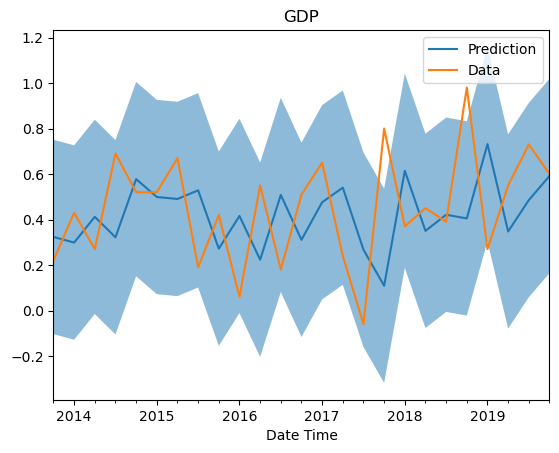

In [31]:
#plot the actual plus the prediction with the confidence interval
fig, ax = plt.subplots()

ax.set_title("GDP")
predictions2["GDP"].plot(ax=ax,label="Prediction")
test_set["GDP"].plot(ax=ax,label="Data")
ax.fill_between(predictions2.index,predictions2["lower"].apply(lambda x: float(x)) ,predictions2["upper"].apply(lambda x: float(x)),alpha=0.5)

ax.legend()

# Evaluate the Forecasts

In [32]:
#make a function that print all the accuracy values for the data
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: GDP')
accuracy_prod = forecast_accuracy(predictions['GDP'].values.astype(float), test_set['GDP'].values.astype(float))

for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: GDP
mape :  0.9975
me :  -0.0272
mae :  0.2424
mpe :  0.1498
rmse :  0.2937
corr :  -0.1527
minmax :  0.4372


# The forecast with Factor Model

In [33]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import statsmodels.tsa.api as sm
from sklearn.decomposition import FactorAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [34]:
# Instantiate the model
factormodel = sm.DynamicFactorMQ(endog=df, factors=2, factor_orders=1,
                           idiosyncratic_ar1=True)
# Fit the DFM
resultsDFM = factormodel.fit(maxiter=1000, disp=True)

EM start iterations, llf=-186.91
EM iteration 2, llf=-179.73, convergence criterion=0.039139
EM iteration 3, llf=-179.73, convergence criterion=9.4108e-08
EM converged at iteration 3, llf=-179.73, convergence criterion=9.4108e-08 < tolerance=1e-06


In [35]:
#predict
dfm_pred = resultsDFM.predict()

In [36]:
dfm_pred

,Sentiments,GDP
Date Time,,
2000-01-01,0.313333,0.710000
2000-04-01,0.202091,0.645551
2000-07-01,0.310743,0.690288
2000-10-01,0.201243,0.505185
2001-01-01,0.192746,0.793449
...,...,...
2018-10-01,-0.000849,0.393177
2019-01-01,0.049227,0.741756
2019-04-01,-0.040065,0.311826


<AxesSubplot:xlabel='Date Time'>

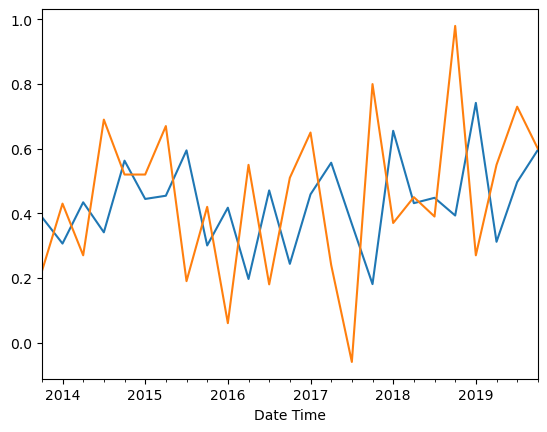

In [37]:
#Plot the forecast with the data
fig, ax = plt.subplots()

dfm_pred.iloc[-len(test_set):]["GDP"].plot(ax=ax)
test_set["GDP"].plot(ax=ax)

In [38]:
factor_forecast_accuracy = forecast_accuracy(dfm_pred.iloc[-len(test_set):]["GDP"].values, test_set["GDP"].values)

for k, v in factor_forecast_accuracy.items():
    print(k, ': ', round(v,4))

mape :  1.0976
me :  -0.0163
mae :  0.2553
mpe :  0.1141
rmse :  0.3032
corr :  -0.2651
minmax :  0.4461


In [39]:
#Use the same factor model but now to forecast the test set
num_oos=len(test_set)
#testset = df.iloc[-num_oos:]
h=1
dfm_forecast = pd.DataFrame()

# Refit w/o test set
model = sm.DynamicFactorMQ(endog=df.iloc[:-num_oos], factors=2, factor_orders=1,
                           idiosyncratic_ar1=True)
results = model.fit(maxiter=100, disp=False)

for i in range(-num_oos,0,h):

    results = results.apply(endog=df.iloc[:i])
    forecast = results.forecast(steps=h)
    dfm_forecast = pd.concat([dfm_forecast, forecast])

mse_gdp = mse(dfm_forecast['GDP'], test_set['GDP'])
print(f'Pseudo out-of-sample MSE of GDP: {round(mse_gdp,5)}')

Pseudo out-of-sample MSE of GDP: 0.09489


In [41]:
factor_forecast_accuracy = forecast_accuracy(dfm_forecast["GDP"].values, test_set["GDP"].values)

for k, v in factor_forecast_accuracy.items():
    print(k, ': ', round(v,4))

mape :  1.0954
me :  -0.0201
mae :  0.2593
mpe :  0.1155
rmse :  0.308
corr :  -0.259
minmax :  0.4536


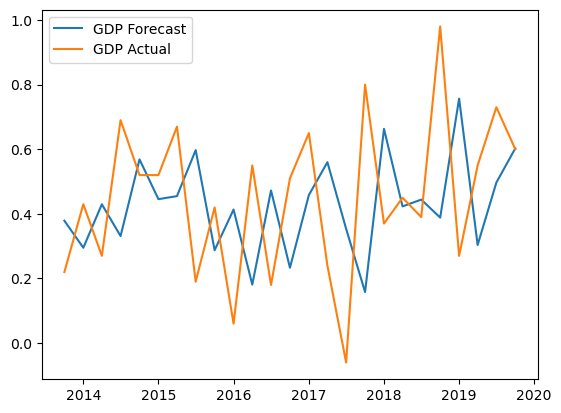

In [40]:
plt.plot(dfm_forecast['GDP'],  label='GDP Forecast')
plt.plot(test_set['GDP'], label='GDP Actual')
plt.legend()
plt.show()

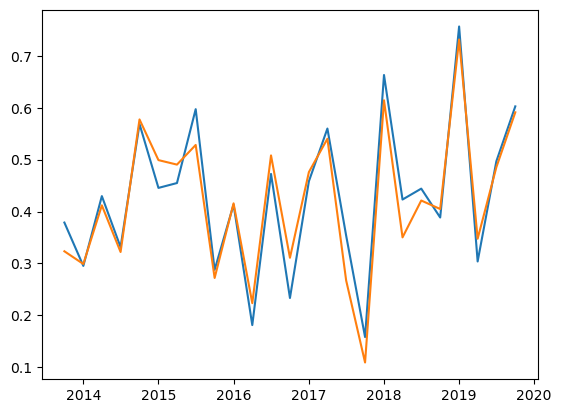